In [1]:
import requests
import json

from PIL import Image
from io import BytesIO
from IPython.display import display

from homeworks.utils.aidevsApi import get_auth_token, get_task, send_answer, API_KEY_OPENAI
from openai import OpenAI

client = OpenAI(api_key=API_KEY_OPENAI)

token = get_auth_token('meme')
task = get_task(token, print_task=True)

task_text = task['text']
task_url = task['image']

----------- Task description -----------
msg: Create meme using RednerForm API and send me the URL to JPG via /answer/ endpoint
service: https://renderform.io/
image: https://zadania.aidevs.pl/data/monkey.png
text: Gdy koledzy z pracy mówią, że ta cała automatyzacja to tylko chwilowa moda, a Ty właśnie zastąpiłeś ich jednym, prostym skryptem
hint: https://zadania.aidevs.pl/hint/meme
-----------    ----------    -----------


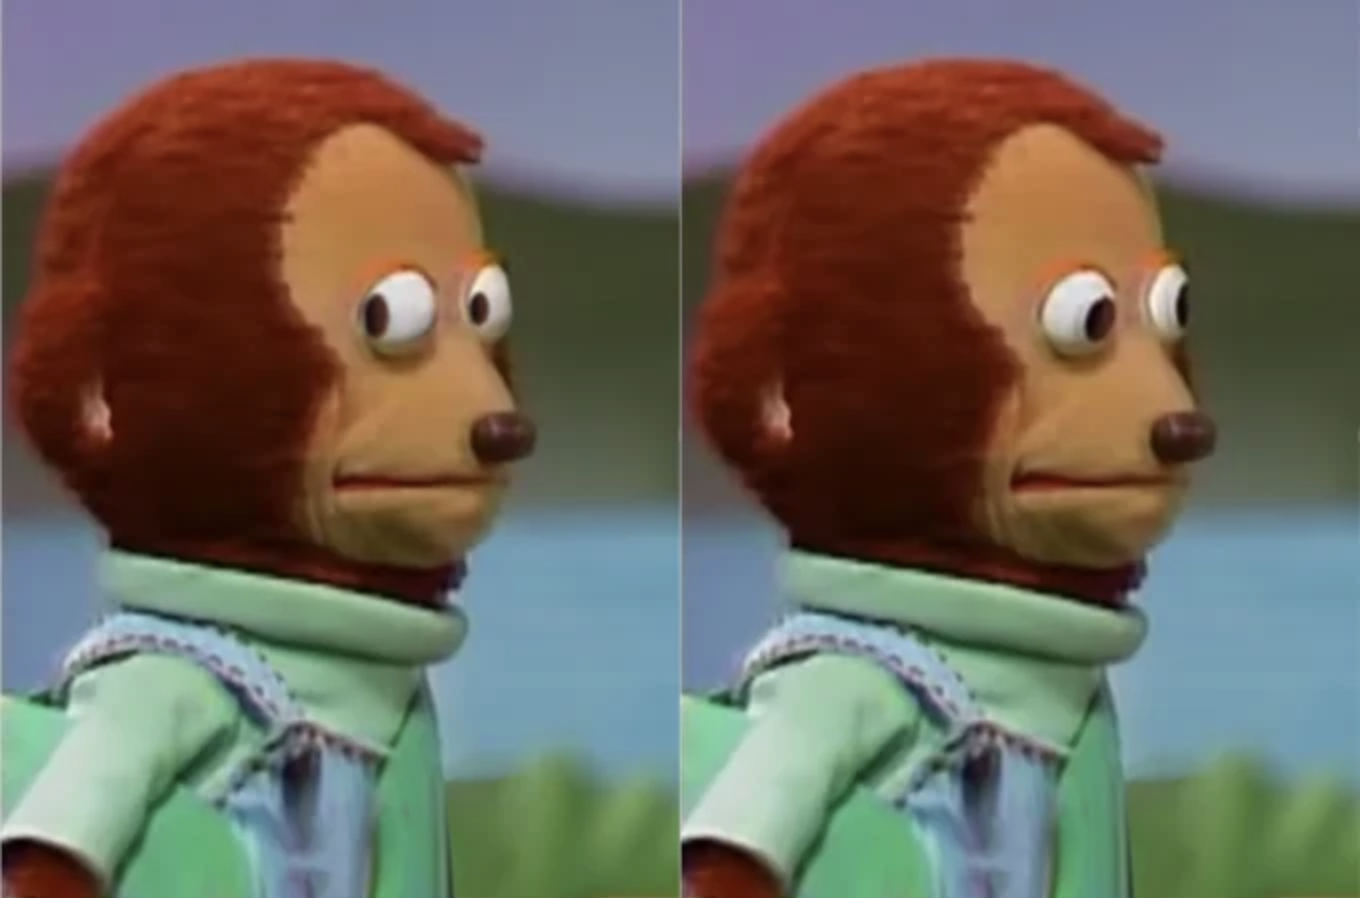

In [2]:
# Function to download an image and return it as a Pillow Image object
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Example usage
task_url = "https://zadania.aidevs.pl/data/monkey.png"
img = download_image(task_url)

# Display the image in the Jupyter Notebook
display(img)

### Using renderform to creating meme

In [3]:
url = "https://get.renderform.io/api/v2/render"

api_key = "key-H5Xc2LpuT4BYKyiPl2u2aiF3vCbZselkHA"
template_id = "bizarre-fairies-beg-gently-1289"

headers = {
    "X-API-KEY": api_key,
    "Content-Type": "application/json"
}

data = {
    "template": template_id,
    "data": {
        "title.text": task_text,
        "image.src": task_url
    }
}

response = requests.post(url, headers=headers, json=data)

if response.status_code == 200:    
    result = response.json()
    meme_url = result.get('href')
    print(f"Request successful: {meme_url}")
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

Request successful: https://cdn.renderform.io/LG1JnQ5rciCvRfbwLqJ6/results/req-7a7cd16b-a973-4bd0-a041-b745f2b78b0b.jpg


In [4]:
send_answer(token, meme_url)

Sending answer: done! :)


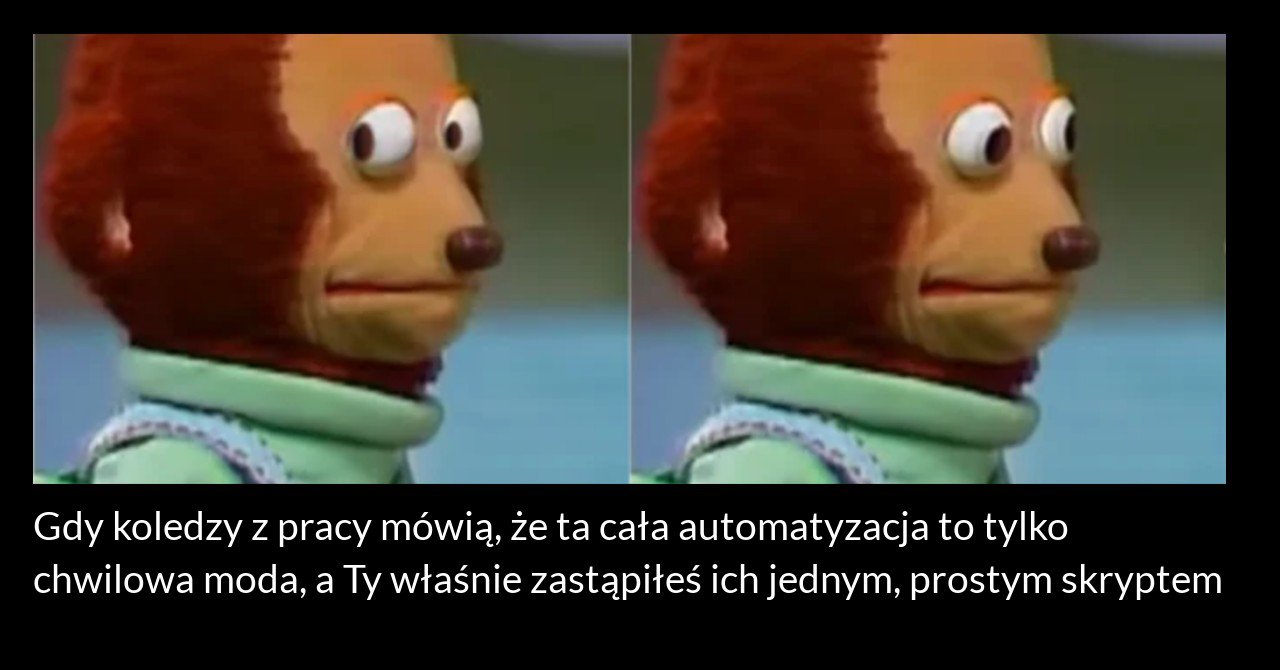

In [5]:
display(download_image(meme_url))